# TfM_Explo_Desc_V1

# This notebook explores and describes the dataset -Tweets.csv-

In [1]:
## Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wordcloud 
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/dsc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
## Read File --Tweets.csv.---
Tweets_df= pd.read_csv('./Data/Tweets.csv')

In [3]:
## Show the shape of the dataset
print(Tweets_df.shape)

(14640, 15)


In [4]:
## Describe Tweets Sentiments.
Tweets_df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [5]:
## Visualize the first 15 rows.
Tweets_df.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [6]:
## Visualize the last 15 rows.
Tweets_df.tail(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


# Explore main features

In [7]:
## Feature: airline_sentiment. This feature shows us the main --sentiments-- register in the dataset. 
print(Tweets_df.airline_sentiment.unique())

['neutral' 'positive' 'negative']


In [8]:
## Feature: airline. This feature show us the main --airlines-- registers in the dataset. 
print(Tweets_df.airline.unique())

['Virgin America' 'United' 'Southwest' 'Delta' 'US Airways' 'American']


In [9]:
## Feature: This feature show us the main  --tweet_location-- registers in the dataset.
print(Tweets_df.user_timezone.unique())

['Eastern Time (US & Canada)' 'Pacific Time (US & Canada)'
 'Central Time (US & Canada)' 'America/New_York' 'Atlantic Time (Canada)'
 'Quito' nan 'Mountain Time (US & Canada)' 'Vienna' 'Caracas'
 'Kuala Lumpur' 'Brisbane' 'Arizona' 'London' 'Tehran' 'Alaska' 'Sydney'
 'Irkutsk' 'Santiago' 'Amsterdam' 'Tijuana' 'Abu Dhabi' 'Central America'
 'Edinburgh' 'Jerusalem' 'Hawaii' 'Paris' 'Guam' 'New Delhi' 'Stockholm'
 'America/Chicago' 'Berlin' 'Madrid' 'Athens' 'Brussels' 'Taipei' 'Rome'
 'Beijing' 'Mexico City' 'Bern' 'Singapore' 'Indiana (East)' 'Melbourne'
 'Saskatchewan' 'Casablanca' 'Brasilia' 'Kyiv' 'Bucharest' 'Greenland'
 'Prague' 'New Caledonia' 'Bogota' 'Seoul' 'Sarajevo' 'Wellington'
 'Bangkok' 'Warsaw' 'Copenhagen' 'Hong Kong' 'Guadalajara' 'Mid-Atlantic'
 'Mazatlan' 'Buenos Aires' 'America/Los_Angeles' 'Dublin' 'Lisbon'
 'Newfoundland' 'Monterrey' 'Tokyo' 'America/Detroit' 'Midway Island'
 'Istanbul' 'Solomon Is.' 'America/Atikokan' 'Adelaide' 'Nairobi' 'EST'
 'Lima' 'Islamabad

In [10]:
## Feature: This feature show us the main  --retweet_count-- registers in the dataset.
print(Tweets_df.retweet_count.unique())

[ 0  1  2  3  4  5  7 22  6 18 15 31 11  8  9 28 32 44]


In [11]:
## Feature: This feature show us the main --airline_sentiment_gold-- registers in the dataset.
print(Tweets_df.airline_sentiment_gold.unique())

[nan 'negative' 'neutral' 'positive']


In [12]:
## Feature: This feature show us the main --name-- registers in the dataset.
print(Tweets_df.name.unique())

['cairdin' 'jnardino' 'yvonnalynn' ... 'KristenReenders' 'itsropes'
 'sanyabun']


# Data Volumetry

In [13]:
## Count nulls values about each feature.
Tweets_df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [14]:
## Ratio 
Tweets_df.isnull().sum()/Tweets_df.shape[0]

tweet_id                        0.000000
airline_sentiment               0.000000
airline_sentiment_confidence    0.000000
negativereason                  0.373087
negativereason_confidence       0.281284
airline                         0.000000
airline_sentiment_gold          0.997268
name                            0.000000
negativereason_gold             0.997814
retweet_count                   0.000000
text                            0.000000
tweet_coord                     0.930396
tweet_created                   0.000000
tweet_location                  0.323292
user_timezone                   0.329235
dtype: float64

In [15]:
## Group by Company Airline and Sentiment.
Tweets_df_gr=Tweets_df.groupby(["airline","airline_sentiment"]).size()
print(Tweets_df_gr)

airline         airline_sentiment
American        negative             1960
                neutral               463
                positive              336
Delta           negative              955
                neutral               723
                positive              544
Southwest       negative             1186
                neutral               664
                positive              570
US Airways      negative             2263
                neutral               381
                positive              269
United          negative             2633
                neutral               697
                positive              492
Virgin America  negative              181
                neutral               171
                positive              152
dtype: int64


In [16]:
## Group by Company Airline and Sentiment and calculate the percentage.
Tweets_df_gr=Tweets_df.groupby(["airline","airline_sentiment"]).size().unstack()
Tweets_df_gr=Tweets_df_gr.div(Tweets_df_gr.sum(axis=1),axis='index')
print(Tweets_df_gr)

airline_sentiment  negative   neutral  positive
airline                                        
American           0.710402  0.167814  0.121783
Delta              0.429793  0.325383  0.244824
Southwest          0.490083  0.274380  0.235537
US Airways         0.776862  0.130793  0.092345
United             0.688906  0.182365  0.128728
Virgin America     0.359127  0.339286  0.301587


# Clean Dataset.

In [17]:
## Show the shape of the dataset
print(Tweets_df.shape)

(14640, 15)


In [18]:
## After the first analysis there some features that's not relevant to observe.
## To improve our analysis the next step is reduce the columns of the Tweets dataset.
## In this step the next features are going to delete:

del Tweets_df['tweet_id']
del Tweets_df['airline_sentiment_gold']
del Tweets_df['negativereason_gold']

In [19]:
## After deleting the 3 fields, the dimension of the dataset is checked.
## Show the shape of the dataset
print(Tweets_df.shape)

(14640, 12)


# Plot Data.

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


Text(0.5,0,'SENTIMENTS BY TWEETS')

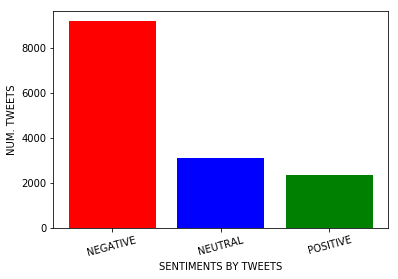

In [20]:
## Plot the number of tweets depending on the type of feeling.
Index=[1, 2, 3]
print(Tweets_df.airline_sentiment.value_counts())
plt.bar(Index, Tweets_df.airline_sentiment.value_counts(),color=['r','b','g'])
plt.xticks(Index, ['NEGATIVE', 'NEUTRAL', 'POSITIVE'], rotation = 15)
plt.ylabel('NUM. TWEETS')
plt.xlabel('SENTIMENTS BY TWEETS')

airline_sentiment  negative   neutral  positive
airline                                        
American           0.710402  0.167814  0.121783
Delta              0.429793  0.325383  0.244824
Southwest          0.490083  0.274380  0.235537
US Airways         0.776862  0.130793  0.092345
United             0.688906  0.182365  0.128728
Virgin America     0.359127  0.339286  0.301587


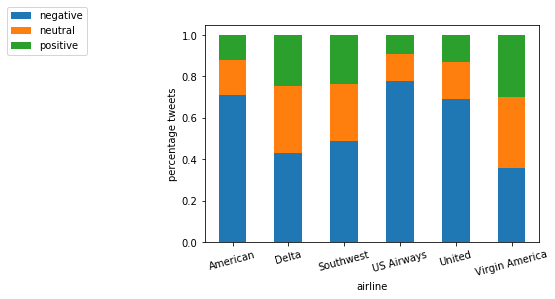

In [21]:
## Proportion of Type of Tweets per Airline.
Tweets_df_gr=Tweets_df.groupby(["airline","airline_sentiment"]).size().unstack()
Tweets_df_gr=Tweets_df_gr.div(Tweets_df_gr.sum(axis=1),axis='index')
print(Tweets_df_gr)
ax=Tweets_df_gr.plot.bar(stacked=True)
plt.ylabel('percentage tweets')
plt.xticks(rotation=15)
plt.legend(bbox_to_anchor=(-0.5, 1), loc=3, borderaxespad=-3)

Text(0,0.5,'Number of Tweets')

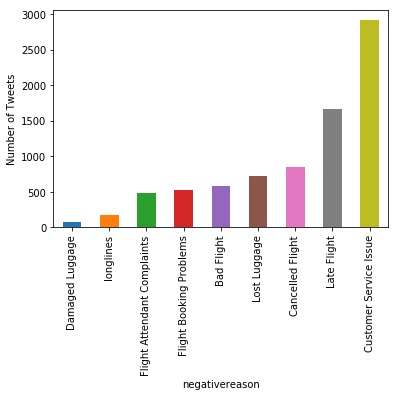

In [22]:
## Plot the number of tweets depending on the negative reason.

negative_tweets=Tweets_df[(Tweets_df.airline_sentiment=="negative") & (Tweets_df.negativereason !="Can't Tell")]
Tweets_df_neg=negative_tweets.groupby(["negativereason"]).size().sort_values()
Tweets_df_neg.plot.bar()
plt.ylabel('Number of Tweets')

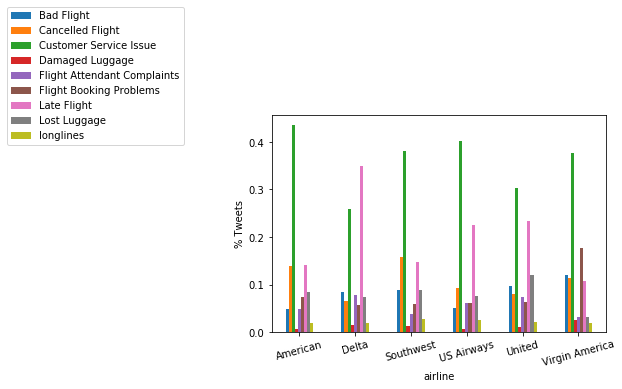

In [23]:
## Plot the percentage of tweets of negative reason per airline.

df=negative_tweets.groupby(["airline","negativereason"]).size().unstack()
df=df.div(df.sum(axis=1),axis='index')#rowsum
ax=df.plot.bar(stacked=False)
plt.ylabel('% Tweets')
plt.xticks(rotation=15)
plt.legend(bbox_to_anchor=(-0.7, 1), loc=3, borderaxespad=-3)

# Negative WordCloud

In [24]:
## Prerequisites to use WordClouds. 
## to install some packages below:
## numpy
## pandas
## matplotlib
## wordcloud

In [25]:
## WordCloud for the negative Tweets.

df_negative=Tweets_df[Tweets_df['airline_sentiment']=='negative']
words = ' '.join(df_negative['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [26]:
stopwords = stopwords.words('english')
wordcloud = WordCloud(stopwords= stopwords,
                      background_color='red',
                      width=3000,
                      height=1000
                     ).generate(cleaned_word)

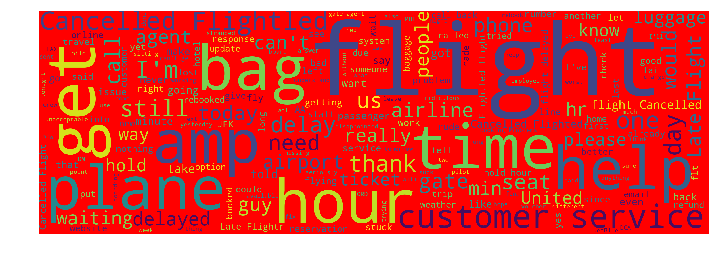

In [27]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Positive WordCloud

In [28]:
## WordCloud for the Positive Tweets.

df_positive=Tweets_df[Tweets_df['airline_sentiment']=='positive']
words = ' '.join(df_positive['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [29]:
wordcloud = WordCloud(stopwords=stopwords,
                      background_color='green',
                      width=3000,
                      height=1000
                     ).generate(cleaned_word)

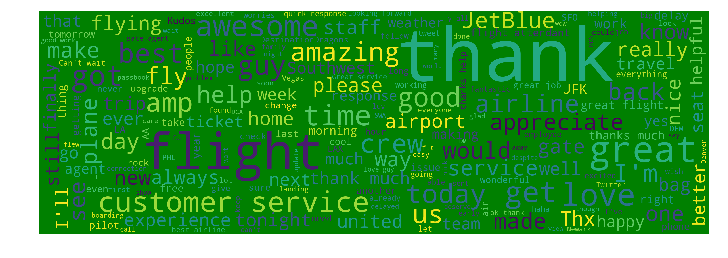

In [30]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Neutral WordCloud

In [31]:
## WordCloud for the Neutral Tweets.

df_neutral=Tweets_df[Tweets_df['airline_sentiment']=='neutral']
words = ' '.join(df_neutral['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [32]:
wordcloud = WordCloud(stopwords=stopwords,
                      background_color='gray',
                      width=3000,
                      height=1000
                     ).generate(cleaned_word)

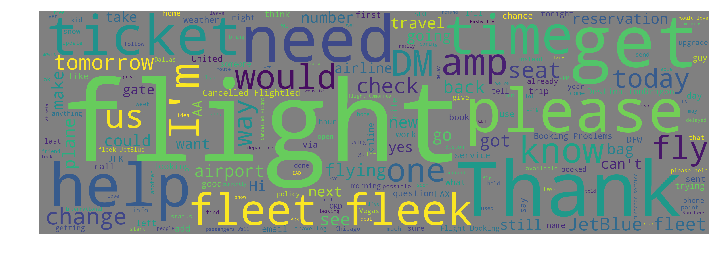

In [33]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()